# Imports

In [1]:
import pandas as pd
import numpy as np
from requests import get
from os import path
from bs4 import BeautifulSoup
import acquire as ac
import prepare
import re
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from scipy import stats
import json

import warnings
warnings.filterwarnings("ignore")

# Acquire

In [2]:
# url = 'https://github.com/search?o=desc&p={num}&q=OpenCV&s=stars&type=Repositories'
# response = get(url)

In [3]:
# urls = ac.get_range_urls(1, 6)
# len(urls)

In [4]:
# urls2 = ac.get_range_urls(6, 11)
# len(urls2)

In [5]:
# urls3 = ac.get_range_urls(11, 16)
# len(urls3)

In [6]:
# urls4 = ac.get_range_urls(16, 21)
# len(urls4)

In [7]:
# urls5 = ac.get_range_urls(21, 26)
# len(urls5)

In [8]:
# all_urls = urls + urls2 + urls3 + urls4 + urls5
# len(all_urls)

In [9]:
# repos = ac.scrape_github_data(all_urls)

In [10]:
repos = pd.read_json('data.json')

In [11]:
repos.head()

,repo,language,readme_contents
0,openframeworks/openFrameworks,C++,[openFrameworks](http://openframeworks.cc/)\n=...
1,opencv/opencv_contrib,C++,## Repository for OpenCV's extra modules\n\nTh...
2,oarriaga/face_classification,Python,# This repository is deprecated for at TF-2.0 ...
3,opencv/opencv,C++,## OpenCV: Open Source Computer Vision Library...
4,Ewenwan/MVision,C++,# MVision Machine Vision 机器视觉\n[AI算法工程师手册 数学基础...


In [12]:
repos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             250 non-null    object
 1   language         243 non-null    object
 2   readme_contents  250 non-null    object
dtypes: object(3)
memory usage: 6.0+ KB


# Prepare

In [13]:
# Creating a cleaned text column
repos['text_cleaned'] = repos.readme_contents.apply(prepare.basic_clean)
# Creating a tokenized text column
repos['text_tokenized'] = repos.text_cleaned.apply(prepare.tokenize)
# Creating a lemmatized text column
repos['text_lemmatized'] = repos.text_tokenized.apply(prepare.lemmatize)
# Creating a filtered text column
repos['text_filtered'] = repos.text_lemmatized.apply(prepare.remove_stopwords)
repos.head()

,repo,language,readme_contents,text_cleaned,text_tokenized,text_lemmatized,text_filtered
0,openframeworks/openFrameworks,C++,[openFrameworks](http://openframeworks.cc/)\n=...,openframeworkshttpopenframeworkscc\n\n\nopenfr...,openframeworkshttpopenframeworkscc\n\n\nopenfr...,openframeworkshttpopenframeworkscc openframewo...,openframeworkshttpopenframeworkscc openframewo...
1,opencv/opencv_contrib,C++,## Repository for OpenCV's extra modules\n\nTh...,repository for opencvs extra modules\n\nthis ...,repository for opencvs extra modules\n\nthis r...,repository for opencvs extra module this repos...,repository opencvs extra module repository int...
2,oarriaga/face_classification,Python,# This repository is deprecated for at TF-2.0 ...,this repository is deprecated for at tf20 rew...,this repository is deprecated for at tf20 rewr...,this repository is deprecated for at tf20 rewr...,repository deprecated tf20 rewrite visit https...
3,opencv/opencv,C++,## OpenCV: Open Source Computer Vision Library...,opencv open source computer vision library\n\...,opencv open source computer vision library\n\n...,opencv open source computer vision library res...,opencv open source computer vision library res...
4,Ewenwan/MVision,C++,# MVision Machine Vision 机器视觉\n[AI算法工程师手册 数学基础...,mvision machine vision \nai httpwwwhuaxia...,mvision machine vision \nai httpwwwhuaxiaozhua...,mvision machine vision ai httpwwwhuaxiaozhuanc...,mvision machine vision ai httpwwwhuaxiaozhuanc...


In [14]:
words = [re.sub(r'([^a-z0-9\s]|\s.\s)', '', doc).split() for doc in repos.text_filtered]

repos = pd.concat([repos, pd.DataFrame({'words': words})], axis=1)

repos.head()

,repo,language,readme_contents,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words
0,openframeworks/openFrameworks,C++,[openFrameworks](http://openframeworks.cc/)\n=...,openframeworkshttpopenframeworkscc\n\n\nopenfr...,openframeworkshttpopenframeworkscc\n\n\nopenfr...,openframeworkshttpopenframeworkscc openframewo...,openframeworkshttpopenframeworkscc openframewo...,"[openframeworkshttpopenframeworkscc, openframe..."
1,opencv/opencv_contrib,C++,## Repository for OpenCV's extra modules\n\nTh...,repository for opencvs extra modules\n\nthis ...,repository for opencvs extra modules\n\nthis r...,repository for opencvs extra module this repos...,repository opencvs extra module repository int...,"[repository, opencvs, extra, module, repositor..."
2,oarriaga/face_classification,Python,# This repository is deprecated for at TF-2.0 ...,this repository is deprecated for at tf20 rew...,this repository is deprecated for at tf20 rewr...,this repository is deprecated for at tf20 rewr...,repository deprecated tf20 rewrite visit https...,"[repository, deprecated, tf20, rewrite, visit,..."
3,opencv/opencv,C++,## OpenCV: Open Source Computer Vision Library...,opencv open source computer vision library\n\...,opencv open source computer vision library\n\n...,opencv open source computer vision library res...,opencv open source computer vision library res...,"[opencv, open, source, computer, vision, libra..."
4,Ewenwan/MVision,C++,# MVision Machine Vision 机器视觉\n[AI算法工程师手册 数学基础...,mvision machine vision \nai httpwwwhuaxia...,mvision machine vision \nai httpwwwhuaxiaozhua...,mvision machine vision ai httpwwwhuaxiaozhuanc...,mvision machine vision ai httpwwwhuaxiaozhuanc...,"[mvision, machine, vision, ai, httpwwwhuaxiaoz..."


In [15]:
repos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             250 non-null    object
 1   language         243 non-null    object
 2   readme_contents  250 non-null    object
 3   text_cleaned     250 non-null    object
 4   text_tokenized   250 non-null    object
 5   text_lemmatized  250 non-null    object
 6   text_filtered    250 non-null    object
 7   words            250 non-null    object
dtypes: object(8)
memory usage: 15.8+ KB


In [16]:
# We need to look at which repos have nulls for language
repos[repos.language.isnull()]

,repo,language,readme_contents,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words
27,amusi/AI-Job-Notes,None,# AI-Job-Notes\nAI算法岗求职攻略：涵盖校招时间表、准备攻略、刷题指南、内推...,aijobnotes\naiai\n\naislam\n\n issues\n\n \n...,aijobnotes\naiai\n\naislam\n\n issues\n\n \n\n...,aijobnotes aiai aislam issue markdowntoc depth...,aijobnotes aiai aislam issue markdowntoc depth...,"[aijobnotes, aiai, aislam, issue, markdowntoc,..."
35,nagadomi/lbpcascade_animeface,None,# lbpcascade_animeface\n\nThe face detector fo...,lbpcascade_animeface\n\nthe face detector for...,lbpcascade_animeface\n\nthe face detector for ...,lbpcascade_animeface the face detector for ani...,lbpcascade_animeface face detector animemanga ...,"[lbpcascadeanimeface, face, detector, animeman..."
39,changwookjun/StudyBook,None,# Study E-Book(ComputerVision DeepLearning Mac...,study ebookcomputervision deeplearning machin...,study ebookcomputervision deeplearning machine...,study ebookcomputervision deeplearning machine...,study ebookcomputervision deeplearning machine...,"[study, ebookcomputervision, deeplearning, mac..."
66,xiangjiana/Android-MS,None,[**版权声明**](#版权声明)\n\n# Android 高级面试\n\n### ![面...,\n\n android \n\n img2020androidpng\n \n andr...,android \n\n img2020androidpng\n \n androidhtt...,android img2020androidpng androidhttpswwwjians...,android img2020androidpng androidhttpswwwjians...,"[android, img2020androidpng, androidhttpswwwji..."
70,opencv/opencv_extra,None,### OpenCV: Open Source Computer Vision Librar...,opencv open source computer vision library\n\...,opencv open source computer vision library\n\n...,opencv open source computer vision library thi...,opencv open source computer vision library rep...,"[opencv, open, source, computer, vision, libra..."
142,huihut/OpenCV-MinGW-Build,None,# OpenCV-MinGW-Build\n\nMinGW 32bit and 64bit ...,opencvmingwbuild\n\nmingw 32bit and 64bit ver...,opencvmingwbuild\n\nmingw 32bit and 64bit vers...,opencvmingwbuild mingw 32bit and 64bit version...,opencvmingwbuild mingw 32bit 64bit version ope...,"[opencvmingwbuild, mingw, 32bit, 64bit, versio..."
166,opencv/opencv_3rdparty,None,### OpenCV: Open Source Computer Vision Librar...,opencv open source computer vision library\n\...,opencv open source computer vision library\n\n...,opencv open source computer vision library thi...,opencv open source computer vision library rep...,"[opencv, open, source, computer, vision, libra..."


In [17]:
# There are only 6 of the 150 so we will just drop them
repos = repos[repos.language.notnull()]
repos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 249
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             243 non-null    object
 1   language         243 non-null    object
 2   readme_contents  243 non-null    object
 3   text_cleaned     243 non-null    object
 4   text_tokenized   243 non-null    object
 5   text_lemmatized  243 non-null    object
 6   text_filtered    243 non-null    object
 7   words            243 non-null    object
dtypes: object(8)
memory usage: 17.1+ KB


In [18]:
# Lets see the breakdown of languages for OpenCV repos
repos.language.value_counts()

Python              101
C++                  79
Java                 16
Jupyter Notebook     10
JavaScript            7
C#                    5
Objective-C           3
Go                    3
Shell                 3
C                     2
PHP                   2
HTML                  2
Scala                 1
Assembly              1
Objective-C++         1
Rust                  1
Dockerfile            1
CMake                 1
Pascal                1
Makefile              1
Matlab                1
Perl                  1
Name: language, dtype: int64

In [19]:
main_two = repos[(repos.language == 'Python') | (repos.language == 'C++')].copy()
main_two.language.value_counts()

Python    101
C++        79
Name: language, dtype: int64

In [20]:
main_two.loc[main_two.language == 'Python', 'language'] = 'python'

In [21]:
main_two.head()

,repo,language,readme_contents,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words
0,openframeworks/openFrameworks,C++,[openFrameworks](http://openframeworks.cc/)\n=...,openframeworkshttpopenframeworkscc\n\n\nopenfr...,openframeworkshttpopenframeworkscc\n\n\nopenfr...,openframeworkshttpopenframeworkscc openframewo...,openframeworkshttpopenframeworkscc openframewo...,"[openframeworkshttpopenframeworkscc, openframe..."
1,opencv/opencv_contrib,C++,## Repository for OpenCV's extra modules\n\nTh...,repository for opencvs extra modules\n\nthis ...,repository for opencvs extra modules\n\nthis r...,repository for opencvs extra module this repos...,repository opencvs extra module repository int...,"[repository, opencvs, extra, module, repositor..."
2,oarriaga/face_classification,python,# This repository is deprecated for at TF-2.0 ...,this repository is deprecated for at tf20 rew...,this repository is deprecated for at tf20 rewr...,this repository is deprecated for at tf20 rewr...,repository deprecated tf20 rewrite visit https...,"[repository, deprecated, tf20, rewrite, visit,..."
3,opencv/opencv,C++,## OpenCV: Open Source Computer Vision Library...,opencv open source computer vision library\n\...,opencv open source computer vision library\n\n...,opencv open source computer vision library res...,opencv open source computer vision library res...,"[opencv, open, source, computer, vision, libra..."
4,Ewenwan/MVision,C++,# MVision Machine Vision 机器视觉\n[AI算法工程师手册 数学基础...,mvision machine vision \nai httpwwwhuaxia...,mvision machine vision \nai httpwwwhuaxiaozhua...,mvision machine vision ai httpwwwhuaxiaozhuanc...,mvision machine vision ai httpwwwhuaxiaozhuanc...,"[mvision, machine, vision, ai, httpwwwhuaxiaoz..."


In [22]:
train_validate, test = train_test_split(main_two.copy(), test_size=.2)
train, validate = train_test_split(train_validate.copy(), test_size=.25)

In [23]:
print(train.shape, validate.shape, test.shape)

(108, 8) (36, 8) (36, 8)


In [24]:
print(train.language.value_counts(), '\n')
print(validate.language.value_counts(), '\n')
print(test.language.value_counts())

python    58
C++       50
Name: language, dtype: int64 

python    23
C++       13
Name: language, dtype: int64 

python    20
C++       16
Name: language, dtype: int64


# Explore

### What are the most common words in READMEs?

In [25]:
# Now we will create word lists for python and C++ repos as they are the majority of our data, and one for all words
python_words = ' '.join(train[train.language=='python'].text_filtered)
c_plus_plus_words = ' '.join(train[train.language=='C++'].text_filtered)
all_words = ' '.join(train.text_filtered)

python_words = re.sub(r'\s.\s', '', python_words)
c_plus_plus_words = re.sub(r'\s.\s', '', c_plus_plus_words)
all_words = re.sub(r'\s.\s', '', all_words)

In [26]:
python_freq = pd.Series(python_words.split()).value_counts()
c_plus_plus_freq = pd.Series(c_plus_plus_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

print('Most common python words:')
print(python_freq.head())
print()
print('Most common c++ words:')
print(c_plus_plus_freq.head())
print()
print('Most common words in all repos:')
print(all_freq.head())

Most common python words:
image                   496
tdtd                    383
python                  294
aligncentersupported    238
model                   197
dtype: int64

Most common c++ words:
opencv    201
image     150
build     134
use       128
using     123
dtype: int64

Most common words in all repos:
image     646
tdtd      383
python    340
opencv    340
using     285
dtype: int64


In [27]:
word_counts = (pd.concat([all_freq, python_freq, c_plus_plus_freq], axis=1, sort=True)
               .set_axis(['all', 'python', 'C++'], axis=1, inplace=False)
               .fillna(0)
               .apply(lambda s: s.astype(int))
              )

word_counts.sort_values(by='all', ascending=False).head(10)

,all,python,C++
image,646,496,150
tdtd,383,383,0
opencv,340,139,201
python,340,294,46
using,285,162,123
use,256,128,128
install,239,167,72
aligncentersupported,238,238,0
face,238,186,52
file,236,160,76


### Does the length of the README vary by programming language?

In [28]:
train['doc_len'] = [len(x) for x in train.words]
validate['doc_len'] = [len(x) for x in validate.words]
test['doc_len'] = [len(x) for x in test.words]

In [29]:
train.head()

,repo,language,readme_contents,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words,doc_len
155,SixQuant/nowatermark,python,# nowatermark\n\n[![PyPI Version](https://img....,nowatermark\n\npypi versionhttpsimgshieldsiop...,nowatermark\n\npypi versionhttpsimgshieldsiopy...,nowatermark pypi versionhttpsimgshieldsiopypiv...,nowatermark pypi versionhttpsimgshieldsiopypiv...,"[nowatermark, pypi, versionhttpsimgshieldsiopy...",132
231,jiafeng5513/Evision,C++,"<div align=center><img width=""100"" height=""100...",div aligncenterimg width100 height100 srcsrcev...,div aligncenterimg width100 height100 srcsrcev...,div aligncenterimg width100 height100 srcsrcev...,div aligncenterimg width100 height100 srcsrcev...,"[div, aligncenterimg, width100, height100, src...",192
9,PySimpleGUI/PySimpleGUI,python,"\n<p align=""center"">\n <img src=""https://raw....",\np aligncenter\n img srchttpsrawgithubuserco...,p aligncenter\n img srchttpsrawgithubuserconte...,p aligncenter img srchttpsrawgithubusercontent...,p aligncenter img srchttpsrawgithubusercontent...,"[p, aligncenter, img, srchttpsrawgithubusercon...",657
190,YuanhaoGong/CurvatureFilter,C++,### Curvature filters are efficient solvers fo...,curvature filters are efficient solvers for v...,curvature filters are efficient solvers for va...,curvature filter are efficient solver for vari...,curvature filter efficient solver variational ...,"[curvature, filter, efficient, solver, variati...",544
2,oarriaga/face_classification,python,# This repository is deprecated for at TF-2.0 ...,this repository is deprecated for at tf20 rew...,this repository is deprecated for at tf20 rewr...,this repository is deprecated for at tf20 rewr...,repository deprecated tf20 rewrite visit https...,"[repository, deprecated, tf20, rewrite, visit,...",162


In [30]:
train.groupby(train.language).doc_len.describe()

,count,mean,std,min,25%,50%,75%,max
language,,,,,,,,
C++,50.0,323.240000,243.464917,7.0,134.25,302.5,461.00,1061.0
python,58.0,580.172414,830.599364,3.0,104.50,209.5,729.75,3719.0


### What does the distribution of IDFs look like for the most common words?

In [31]:
def idf(word):
    n_occurences = sum([1 for doc in train.text_filtered if word in doc])
    return np.log(len(train.words) / n_occurences)

In [32]:
unique_words = pd.Series(' '.join(train.text_filtered).split()).unique()

In [33]:
unique_words

array(['nowatermark', 'pypi',
       'versionhttpsimgshieldsiopypivnowatermarksvghttpspypipythonorgpypinowatermark',
       ...,
       'posithttpsrawgithubcommasteringopencvcodemasterchapter7_headposeestimationscreenshotpng',
       'fisherfaceshttpsrawgithubcommasteringopencvcodemasterchapter8_facerecognitionscreenshotpng',
       'kinecthttpsrawgithubcommasteringopencvcodemasterchapter9_fluidinteractionusingkinectscreenshotpng'],
      dtype=object)

In [34]:
idf_words = (pd.DataFrame(dict(word=unique_words))
 .assign(idf=lambda df: df.word.apply(idf))
 .set_index('word')
 .sort_values(by='idf', ascending=False))
idf_words.head(10)

,idf
word,
is_fake_replay,4.682131
sturmovik,4.682131
donovan,4.682131
baarda,4.682131
filteringcontrol,4.682131
mathijs,4.682131
groothuis,4.682131
mathijsg,4.682131
dozen,4.682131


In [35]:
idf_words.describe()

,idf
count,12353.000000
mean,4.104823
std,1.039659
min,0.000000
25%,3.988984
50%,4.682131
75%,4.682131
max,4.682131


In [36]:
top_five_words = pd.DataFrame()
for word in all_freq.head().index:
    hold = idf_words[idf_words.index == word]
    top_five_words = top_five_words.append(hold)

In [37]:
top_five_words.sort_values(by='idf', ascending=False)

,idf
word,
tdtd,4.682131
python,0.492476
using,0.433636
image,0.391672
opencv,0.107420


In [38]:
top_five_python = pd.DataFrame()
for word in python_freq.head().index:
    hold = idf_words[idf_words.index == word]
    top_five_python = top_five_python.append(hold)

In [39]:
top_five_python.sort_values(by='idf').sort_values(by='idf', ascending=False).head()

,idf
word,
tdtd,4.682131
aligncentersupported,4.682131
model,1.044545
python,0.492476
image,0.391672


In [40]:
top_five_cplus2 = pd.DataFrame()
for word in c_plus_plus_freq.head().index:
    hold = idf_words[idf_words.index == word]
    top_five_cplus2 = top_five_cplus2.append(hold)

In [41]:
top_five_cplus2.sort_values(by='idf', ascending=False).head()

,idf
word,
build,0.730888
using,0.433636
image,0.391672
use,0.300105
opencv,0.107420


### Comparing Doc Length

In [42]:
train.doc_len.describe()

count     108.000000
mean      461.222222
std       641.268607
min         3.000000
25%       115.750000
50%       250.500000
75%       546.750000
max      3719.000000
Name: doc_len, dtype: float64

In [43]:
train[train.language == 'python'].doc_len.describe()

count      58.000000
mean      580.172414
std       830.599364
min         3.000000
25%       104.500000
50%       209.500000
75%       729.750000
max      3719.000000
Name: doc_len, dtype: float64

In [44]:
train[train.language == 'C++'].doc_len.describe()

count      50.000000
mean      323.240000
std       243.464917
min         7.000000
25%       134.250000
50%       302.500000
75%       461.000000
max      1061.000000
Name: doc_len, dtype: float64

### Comparing Top Ten Words From Each Language

In [45]:
top_ten_python = word_counts['python'].sort_values(ascending=False).head(10)

top_ten_cplus2 = word_counts['C++'].sort_values(ascending=False).head(10)

top_ten_both = list(top_ten_python.index) + list(top_ten_cplus2.index)

top_ten_combined = word_counts[word_counts.index.isin(top_ten_both)]

In [46]:
top_ten_combined

,all,python,C++
aligncentersupported,238,238,0
build,162,29,134
camera,206,131,75
example,168,75,93
face,238,186,52
file,236,160,76
image,646,496,150
install,239,167,72
library,139,65,74
model,215,197,18


In [47]:
word_counts['pct_python'] = word_counts['python'] / word_counts['all']
word_counts['pct_cplus2'] = word_counts['C++'] / word_counts['all']

In [48]:
# There are words in word counts with 0 for values
word_counts = word_counts[word_counts['all'] != 0]
word_counts['all'].sort_values()

httpsgithubcomleonidpishchulinposevalgit      1
lda                                           1
ldanlp                                        1
twice                                         1
lead                                          1
                                           ... 
using                                       285
python                                      340
opencv                                      340
tdtd                                        383
image                                       646
Name: all, Length: 12886, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text yticklabel objects>)

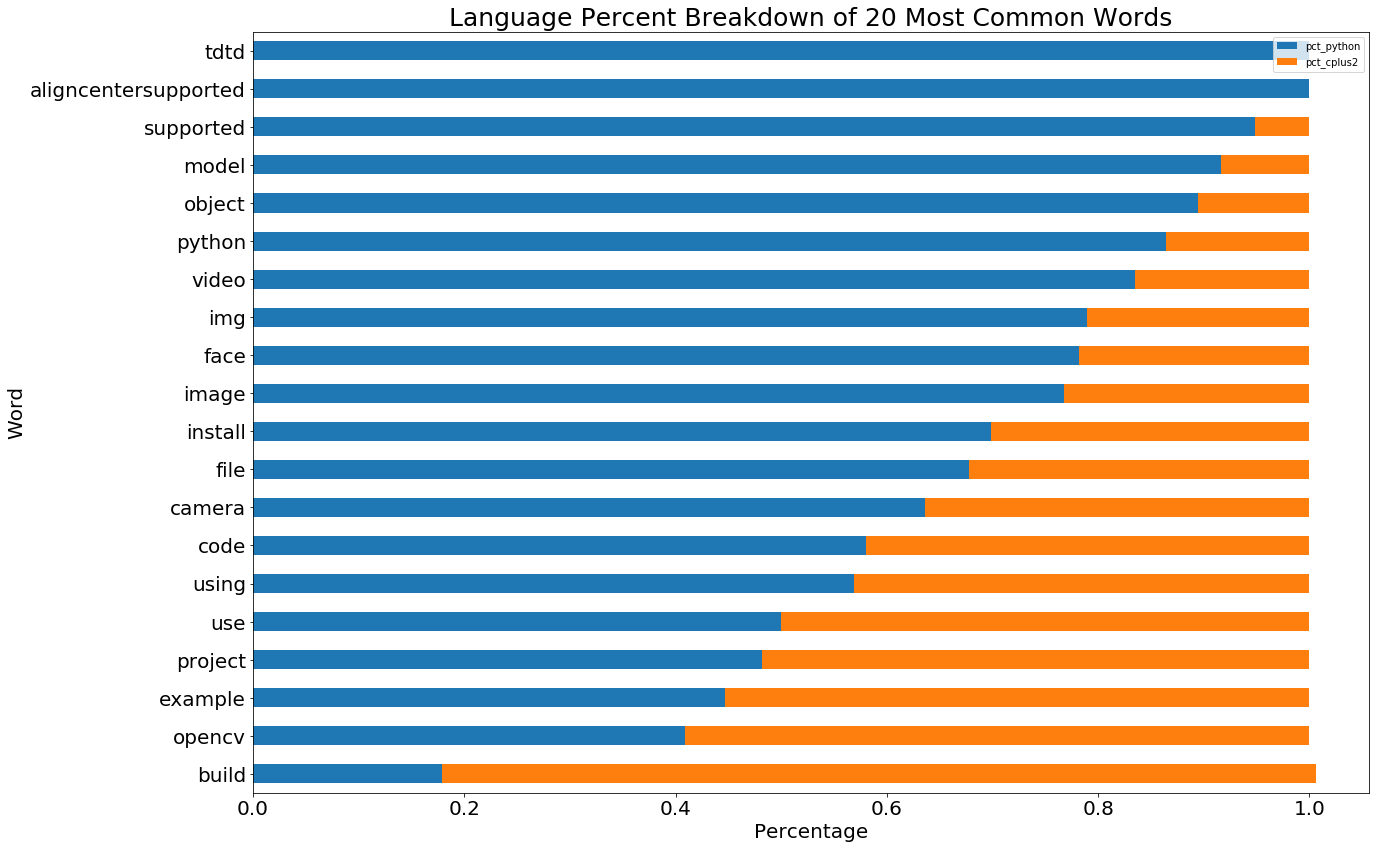

In [49]:
(word_counts.sort_values(by='all')[['pct_python', 'pct_cplus2']].tail(20).sort_values(by='pct_python')
 .plot.barh(stacked=True, figsize=(20,14)))
plt.title('Language Percent Breakdown of 20 Most Common Words', fontsize=25)
plt.xlabel('Percentage', fontsize=20)
plt.ylabel('Word', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

### Trimming Train
Now we will trim train down so that we can add features before pushing into modeling.

In [50]:
train = train.drop(columns=['readme_contents', 'text_cleaned', 'text_tokenized', 'text_lemmatized', 'repo'])
train.head()

,language,text_filtered,words,doc_len
155,python,nowatermark pypi versionhttpsimgshieldsiopypiv...,"[nowatermark, pypi, versionhttpsimgshieldsiopy...",132
231,C++,div aligncenterimg width100 height100 srcsrcev...,"[div, aligncenterimg, width100, height100, src...",192
9,python,p aligncenter img srchttpsrawgithubusercontent...,"[p, aligncenter, img, srchttpsrawgithubusercon...",657
190,C++,curvature filter efficient solver variational ...,"[curvature, filter, efficient, solver, variati...",544
2,python,repository deprecated tf20 rewrite visit https...,"[repository, deprecated, tf20, rewrite, visit,...",162


In [64]:
train['has_model'] = train.text_filtered.str.contains('model')
validate['has_model'] = validate.text_filtered.str.contains('model')
test['has_model'] = test.text_filtered.str.contains('model')

train['has_build'] = train.text_filtered.str.contains('build')
validate['has_build'] = validate.text_filtered.str.contains('build')
test['has_build'] = test.text_filtered.str.contains('build')

train['has_python'] = train.text_filtered.str.contains('python')
validate['has_python'] = validate.text_filtered.str.contains('python')
test['has_python'] = test.text_filtered.str.contains('python')

train['has_supported'] = (train.text_filtered.str.contains('supported') | train.text_filtered.str.contains('aligncentersupported'))
validate['has_supported'] = (validate.text_filtered.str.contains('supported') | validate.text_filtered.str.contains('aligncentersupported'))
test['has_supported'] = (test.text_filtered.str.contains('supported') | test.text_filtered.str.contains('aligncentersupported'))

train['has_tdtd'] = train.text_filtered.str.contains('tdtd')
validate['has_tdtd'] = validate.text_filtered.str.contains('tdtd')
test['has_tdtd'] = test.text_filtered.str.contains('tdtd')

In [65]:
larger_docs = train[train['doc_len'] >= 800]

train['has_larger_doc'] = train.index.isin(larger_docs.index)
train.head()

,language,text_filtered,words,doc_len,has_model,has_build,has_python,has_supported,has_tdtd,has_larger_doc
155,python,nowatermark pypi versionhttpsimgshieldsiopypiv...,"[nowatermark, pypi, versionhttpsimgshieldsiopy...",132,False,True,True,False,False,False
231,C++,div aligncenterimg width100 height100 srcsrcev...,"[div, aligncenterimg, width100, height100, src...",192,False,True,False,False,False,False
9,python,p aligncenter img srchttpsrawgithubusercontent...,"[p, aligncenter, img, srchttpsrawgithubusercon...",657,False,False,True,False,False,False
190,C++,curvature filter efficient solver variational ...,"[curvature, filter, efficient, solver, variati...",544,True,False,False,False,False,False
2,python,repository deprecated tf20 rewrite visit https...,"[repository, deprecated, tf20, rewrite, visit,...",162,True,False,True,False,False,False


In [66]:
train.has_larger_doc.value_counts()

False    92
True     16
Name: has_larger_doc, dtype: int64

## Hypothesis Tests

### Hypothesis Test 1

$H_0$: The word model in a document and its programming language are independent  
$H_a$: The word model in a document and its programming language are dependent  
a = .05

In [67]:
# We will be doing a chi2 test for this hypothesis
observed = pd.crosstab(train.language, train.has_model)

chi2, p, degf, expected = stats.chi2_contingency(observed)

print(f'has_model values\nchi2: {chi2}\tp: {p}')

has_model values
chi2: 4.235156857661396	p: 0.03959496469769989


In [68]:
observed

has_model,False,True
language,,
C++,38,12
python,32,26


### Hypothesis Test 2

$H_0$: The word build in a document and its programming language are independent  
$H_a$: The word build in a document and its programming language are dependent  
a = .05

In [69]:
# We will be doing a chi2 test for this hypothesis
observed = pd.crosstab(train.language, train.has_build)

chi2, p, degf, expected = stats.chi2_contingency(observed)

print(f'has_build values\nchi2: {chi2}\tp: {p}')

has_build values
chi2: 10.590517241379313	p: 0.0011366917154050954


In [70]:
observed

has_build,False,True
language,,
C++,17,33
python,39,19


### Hypothesis Test 3

$H_0$: The length of a documents is independent of its programming language  
$H_a$: The longer a document is the more likely it is to be a python document  
a = .05

In [71]:
# We will be performing a two-tailed t-test for this hypothesis
x1 = train[train.language == 'python'].doc_len
x2 = train[train.language == 'C++'].doc_len

stats.ttest_ind(x1, x2)

Ttest_indResult(statistic=2.1093859262040024, pvalue=0.03726597743724576)

### Hypothesis Test 4

$H_0$: The word python in a document and its programming language are independent  
$H_a$: The word python in a document and its programming language are dependent  
a = .05

In [73]:
# We will be doing a chi2 test for this hypothesis test
observed = pd.crosstab(train.language, train.has_python)

chi2, p, degf, expected = stats.chi2_contingency(observed)

print(f'has_python values\nchi2: {chi2}\tp: {p}')

has_python values
chi2: 40.39528884908196	p: 2.0744070096714567e-10


In [74]:
observed

has_python,False,True
language,,
C++,36,14
python,6,52


Features worth keeping: has_python, has_build, has_model

In [77]:
train = train.drop(columns=['doc_len', 'has_larger_doc', 'words'])

# Modeling

In [78]:
# We need to convert all our true false features into 1s and 0s
train['has_model'] = np.where((train.has_model == True), 1, 0)
train['has_build'] = np.where((train.has_build == True), 1, 0)
train['has_python'] = np.where((train.has_python == True), 1, 0)
train['has_supported'] = np.where((train.has_model == True), 1, 0)
train['has_tdtd'] = np.where((train.has_model == True), 1, 0)

validate['has_model'] = np.where((validate.has_model == True), 1, 0)
validate['has_build'] = np.where((validate.has_build == True), 1, 0)
validate['has_python'] = np.where((validate.has_python == True), 1, 0)
validate['has_supported'] = np.where((validate.has_model == True), 1, 0)
validate['has_tdtd'] = np.where((validate.has_model == True), 1, 0)

test['has_model'] = np.where((test.has_model == True), 1, 0)
test['has_build'] = np.where((test.has_build == True), 1, 0)
test['has_python'] = np.where((test.has_python == True), 1, 0)
test['has_supported'] = np.where((test.has_python == True), 1, 0)
test['has_tdtd'] = np.where((test.has_python == True), 1, 0)

### Baseline

In [79]:
# We need to have a baseline to compare to
train.language.value_counts()

python    58
C++       50
Name: language, dtype: int64

In [80]:
train['baseline'] = 'python'
train.head()

,language,text_filtered,has_model,has_build,has_python,has_supported,has_tdtd,baseline
155,python,nowatermark pypi versionhttpsimgshieldsiopypiv...,0,1,1,0,0,python
231,C++,div aligncenterimg width100 height100 srcsrcev...,0,1,0,0,0,python
9,python,p aligncenter img srchttpsrawgithubusercontent...,0,0,1,0,0,python
190,C++,curvature filter efficient solver variational ...,1,0,0,1,1,python
2,python,repository deprecated tf20 rewrite visit https...,1,0,1,1,1,python


In [81]:
print(classification_report(train.language, train.baseline))

              precision    recall  f1-score   support

         C++       0.00      0.00      0.00        50
      python       0.54      1.00      0.70        58

    accuracy                           0.54       108
   macro avg       0.27      0.50      0.35       108
weighted avg       0.29      0.54      0.38       108



## Train Models

In [82]:
train.head()

,language,text_filtered,has_model,has_build,has_python,has_supported,has_tdtd,baseline
155,python,nowatermark pypi versionhttpsimgshieldsiopypiv...,0,1,1,0,0,python
231,C++,div aligncenterimg width100 height100 srcsrcev...,0,1,0,0,0,python
9,python,p aligncenter img srchttpsrawgithubusercontent...,0,0,1,0,0,python
190,C++,curvature filter efficient solver variational ...,1,0,0,1,1,python
2,python,repository deprecated tf20 rewrite visit https...,1,0,1,1,1,python


### has_model Model

In [83]:
y_train = train.language
x_train_model = train[['has_model']]

In [84]:
lr_model = LogisticRegression(random_state=123)

lr_model.fit(x_train_model, y_train)

train['model_prediction'] = lr_model.predict(x_train_model)

print(classification_report(train.language, train.model_prediction))

              precision    recall  f1-score   support

         C++       0.54      0.76      0.63        50
      python       0.68      0.45      0.54        58

    accuracy                           0.59       108
   macro avg       0.61      0.60      0.59       108
weighted avg       0.62      0.59      0.58       108



### has_build Model

In [85]:
x_train_build = train[['has_build']]

lr_build = LogisticRegression(random_state=123)

lr_build.fit(x_train_build, y_train)

train['build_prediction'] = lr_build.predict(x_train_build)

print(classification_report(train.language, train.build_prediction))

              precision    recall  f1-score   support

         C++       0.63      0.66      0.65        50
      python       0.70      0.67      0.68        58

    accuracy                           0.67       108
   macro avg       0.67      0.67      0.67       108
weighted avg       0.67      0.67      0.67       108



### has_python Model

In [86]:
x_train_python = train[['has_python']]

lr_python = LogisticRegression(random_state=123)

lr_python.fit(x_train_python, y_train)

train['python_prediction'] = lr_python.predict(x_train_python)

print(classification_report(train.language, train.python_prediction))

              precision    recall  f1-score   support

         C++       0.86      0.72      0.78        50
      python       0.79      0.90      0.84        58

    accuracy                           0.81       108
   macro avg       0.82      0.81      0.81       108
weighted avg       0.82      0.81      0.81       108



### Bag of Words Model

In [87]:
vectorizer = CountVectorizer(stop_words='english', 
                             min_df=20, 
                             ngram_range=(1,2), 
                             binary=True)

vectorizer.fit(train.text_filtered)

vectorizer.get_feature_names()

x_bow = vectorizer.transform(train.text_filtered)

lr_bag = LogisticRegression(random_state=123)

lr_bag = lr_bag.fit(x_bow, y_train)

train['bag_prediction'] = lr_bag.predict(x_bow)

print(classification_report(train.language, train.bag_prediction))

              precision    recall  f1-score   support

         C++       1.00      0.98      0.99        50
      python       0.98      1.00      0.99        58

    accuracy                           0.99       108
   macro avg       0.99      0.99      0.99       108
weighted avg       0.99      0.99      0.99       108



### TF-IDF Model

In [88]:
tfidf = TfidfVectorizer(stop_words='english', min_df = 20,
                             ngram_range=(1,2), 
                             binary=True)

tfidf_matrix = tfidf.fit_transform(train.text_filtered)

tfidf.vocabulary_

vector_spaces = tfidf.transform(train.text_filtered)

x_tf = tfidf_matrix

lr_tf = LogisticRegression(random_state=123)

lr_tf = lr_tf.fit(x_tf, y_train)

train['tfidf_prediction'] = lr_tf.predict(x_tf)

print(classification_report(train.language, train.tfidf_prediction))

              precision    recall  f1-score   support

         C++       0.98      0.90      0.94        50
      python       0.92      0.98      0.95        58

    accuracy                           0.94       108
   macro avg       0.95      0.94      0.94       108
weighted avg       0.95      0.94      0.94       108



### Combined Terms Model

In [89]:
x_train_combo = train[['has_model', 'has_build', 'has_python']]

lr_combo = LogisticRegression(random_state=123)

lr_combo.fit(x_train_combo, y_train)

train['combo_prediction'] = lr_combo.predict(x_train_combo)

print(classification_report(train.language, train.combo_prediction))

              precision    recall  f1-score   support

         C++       0.86      0.72      0.78        50
      python       0.79      0.90      0.84        58

    accuracy                           0.81       108
   macro avg       0.82      0.81      0.81       108
weighted avg       0.82      0.81      0.81       108



Three best models are TF-IDF model, Bag of Words Model, and Combined Terms Model.

## Validation Models

In [90]:
validate = validate.drop(columns=['repo', 'readme_contents', 'text_cleaned', 'text_tokenized', 'text_lemmatized', 'words', 'doc_len'])
validate.head()

,language,text_filtered,has_model,has_build,has_python,has_supported,has_tdtd
67,python,kofihttpswwwkoficomimggithubbutton_smsvghttpsk...,1,0,1,1,1
162,python,objecttracker imagedocsimagescoverimage1png _r...,0,0,1,0,0
95,python,pycv 9758 repository longer actively maintaine...,0,0,1,0,0
88,C++,captchabreak captcha break based opencv2 tesse...,0,0,1,0,0
31,C++,learning opencv 3 intro example code accompani...,1,1,0,1,1


### Bag of Words Model

In [91]:
v_bow = vectorizer.transform(validate.text_filtered)

validate['bag_prediction'] = lr_bag.predict(v_bow)

print(classification_report(validate.language, validate.bag_prediction))

              precision    recall  f1-score   support

         C++       0.69      0.69      0.69        13
      python       0.83      0.83      0.83        23

    accuracy                           0.78        36
   macro avg       0.76      0.76      0.76        36
weighted avg       0.78      0.78      0.78        36



### TF-IDF Model

In [92]:
tfidf_matrix = tfidf.transform(validate.text_filtered)

vector_spaces = tfidf.transform(validate.text_filtered)

x_tf = tfidf_matrix

validate['tfidf_prediction'] = lr_tf.predict(x_tf)

print(classification_report(validate.language, validate.tfidf_prediction))

              precision    recall  f1-score   support

         C++       0.62      0.62      0.62        13
      python       0.78      0.78      0.78        23

    accuracy                           0.72        36
   macro avg       0.70      0.70      0.70        36
weighted avg       0.72      0.72      0.72        36



### Combined Terms Model

In [94]:
x_validate_combo = validate[['has_model', 'has_build', 'has_python', 'has_supported', 'has_tdtd']]
y_validate = validate.language

lr_combo.fit(x_validate_combo, y_validate)

validate['combo_prediction'] = lr_combo.predict(x_validate_combo)

print(classification_report(validate.language, validate.combo_prediction))

              precision    recall  f1-score   support

         C++       1.00      0.62      0.76        13
      python       0.82      1.00      0.90        23

    accuracy                           0.86        36
   macro avg       0.91      0.81      0.83        36
weighted avg       0.89      0.86      0.85        36



Our best model is the Combined Terms model, we will be taking this one in to test.

## Test Model

In [96]:
x_test_combo = test[['has_model', 'has_build', 'has_python', 'has_supported', 'has_tdtd']]
y_test = test.language

lr_combo.fit(x_test_combo, y_test)

test['combo_prediction'] = lr_combo.predict(x_test_combo)

print(classification_report(test.language, test.combo_prediction))

              precision    recall  f1-score   support

         C++       0.86      0.75      0.80        16
      python       0.82      0.90      0.86        20

    accuracy                           0.83        36
   macro avg       0.84      0.82      0.83        36
weighted avg       0.84      0.83      0.83        36



# Entire Dataset

In [97]:
main_two = main_two.drop(columns=['repo', 'readme_contents', 'text_cleaned', 'text_tokenized', 'text_lemmatized', 'words'])
main_two.head()


,language,text_filtered
0,C++,openframeworkshttpopenframeworkscc openframewo...
1,C++,repository opencvs extra module repository int...
2,python,repository deprecated tf20 rewrite visit https...
3,C++,opencv open source computer vision library res...
4,C++,mvision machine vision ai httpwwwhuaxiaozhuanc...


In [100]:
main_two['has_model'] = main_two.text_filtered.str.contains('model')

main_two['has_build'] = main_two.text_filtered.str.contains('build')

main_two['has_python'] = main_two.text_filtered.str.contains('python')

main_two['has_supported'] = (main_two.text_filtered.str.contains('supported') | main_two.text_filtered.str.contains('aligncentersupported'))

main_two['has_tdtd'] = main_two.text_filtered.str.contains('tdtd')

main_two['has_model'] = np.where((main_two.has_model == True), 1, 0)
main_two['has_build'] = np.where((main_two.has_build == True), 1, 0)
main_two['has_python'] = np.where((main_two.has_python == True), 1, 0)
main_two['has_supported'] = np.where((main_two.has_supported == True), 1, 0)
main_two['has_tdtd'] = np.where((main_two.has_tdtd == True), 1, 0)

In [101]:
main_two.head()

,language,text_filtered,has_model,has_build,has_python,has_supported,has_tdtd
0,C++,openframeworkshttpopenframeworkscc openframewo...,0,1,0,0,0
1,C++,repository opencvs extra module repository int...,1,1,0,0,0
2,python,repository deprecated tf20 rewrite visit https...,1,0,1,0,0
3,C++,opencv open source computer vision library res...,0,0,0,0,0
4,C++,mvision machine vision ai httpwwwhuaxiaozhuanc...,1,1,1,0,0


In [102]:
x_full_combo = main_two[['has_model', 'has_build', 'has_python']]
y_full = main_two.language

lr_combo.fit(x_full_combo, y_full)

main_two['combo_prediction'] = lr_combo.predict(x_full_combo)

print(classification_report(main_two.language, main_two.combo_prediction))

              precision    recall  f1-score   support

         C++       0.88      0.71      0.78        79
      python       0.80      0.92      0.86       101

    accuracy                           0.83       180
   macro avg       0.84      0.81      0.82       180
weighted avg       0.83      0.83      0.82       180

